Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Get the dataset

In [ ]:
df=pd.read_csv('/content/House_rent_Dataset.csv')

In [ ]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Explore and Visualize the data

1) Information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


2) Dataset Description

In [ ]:
df.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


Unique values in each feature

In [ ]:
df.nunique()

,0
Posted On,81
BHK,6
Rent,243
Size,615
Floor,480
Area Type,3
Area Locality,2235
City,6
Furnishing Status,3
Tenant Preferred,3


Finding the number of nulls

In [ ]:
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


Plot all the Histograms

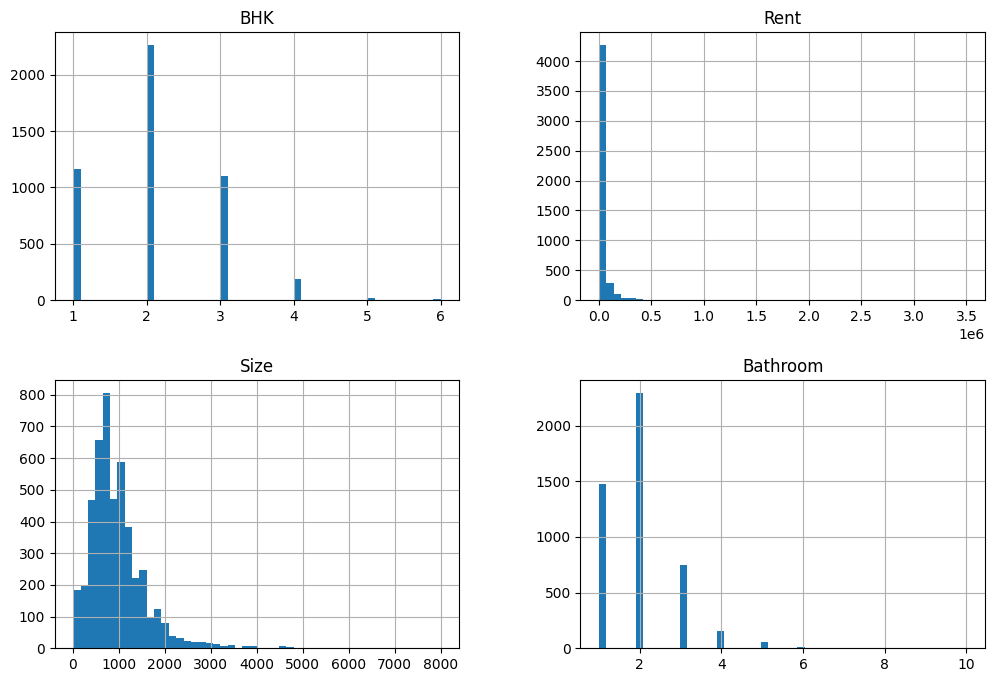

In [ ]:
df.hist(bins=50,figsize=(12,8))
plt.show()

Histogram for Rent Distribution

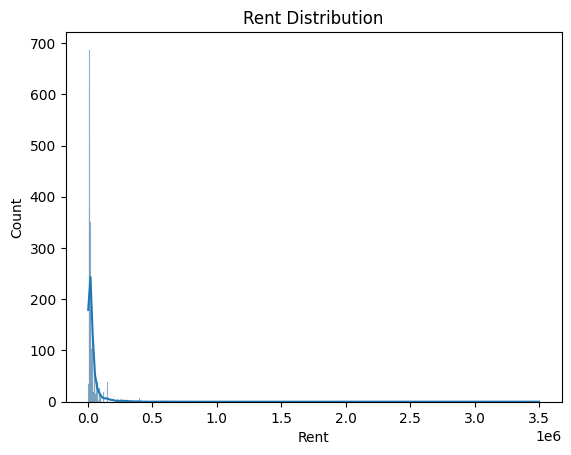

In [ ]:
sns.histplot(df['Rent'],kde=True)
plt.title('Rent Distribution')
plt.show()

In [ ]:
df["Rent_log"] = np.log1p(df["Rent"])

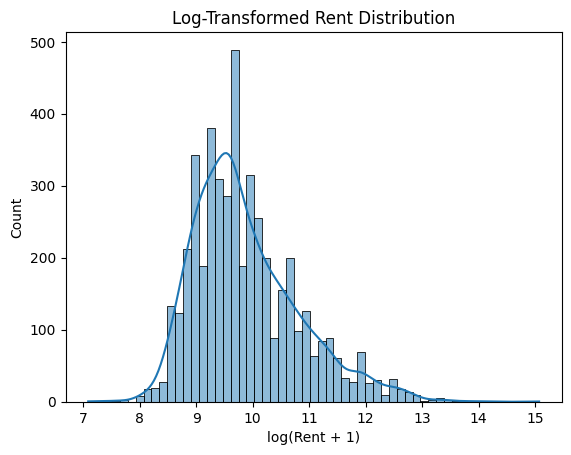

In [ ]:
sns.histplot(df["Rent_log"], kde=True)
plt.title("Log-Transformed Rent Distribution")
plt.xlabel("log(Rent + 1)")
plt.show()

Co-relation Heatmap

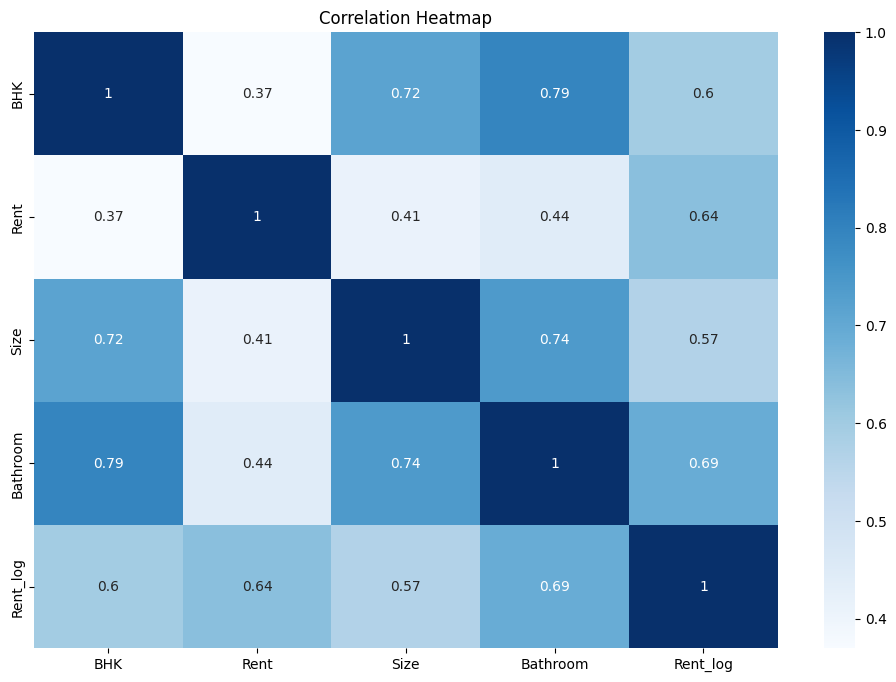

In [ ]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

Boxplot for identifying outliers

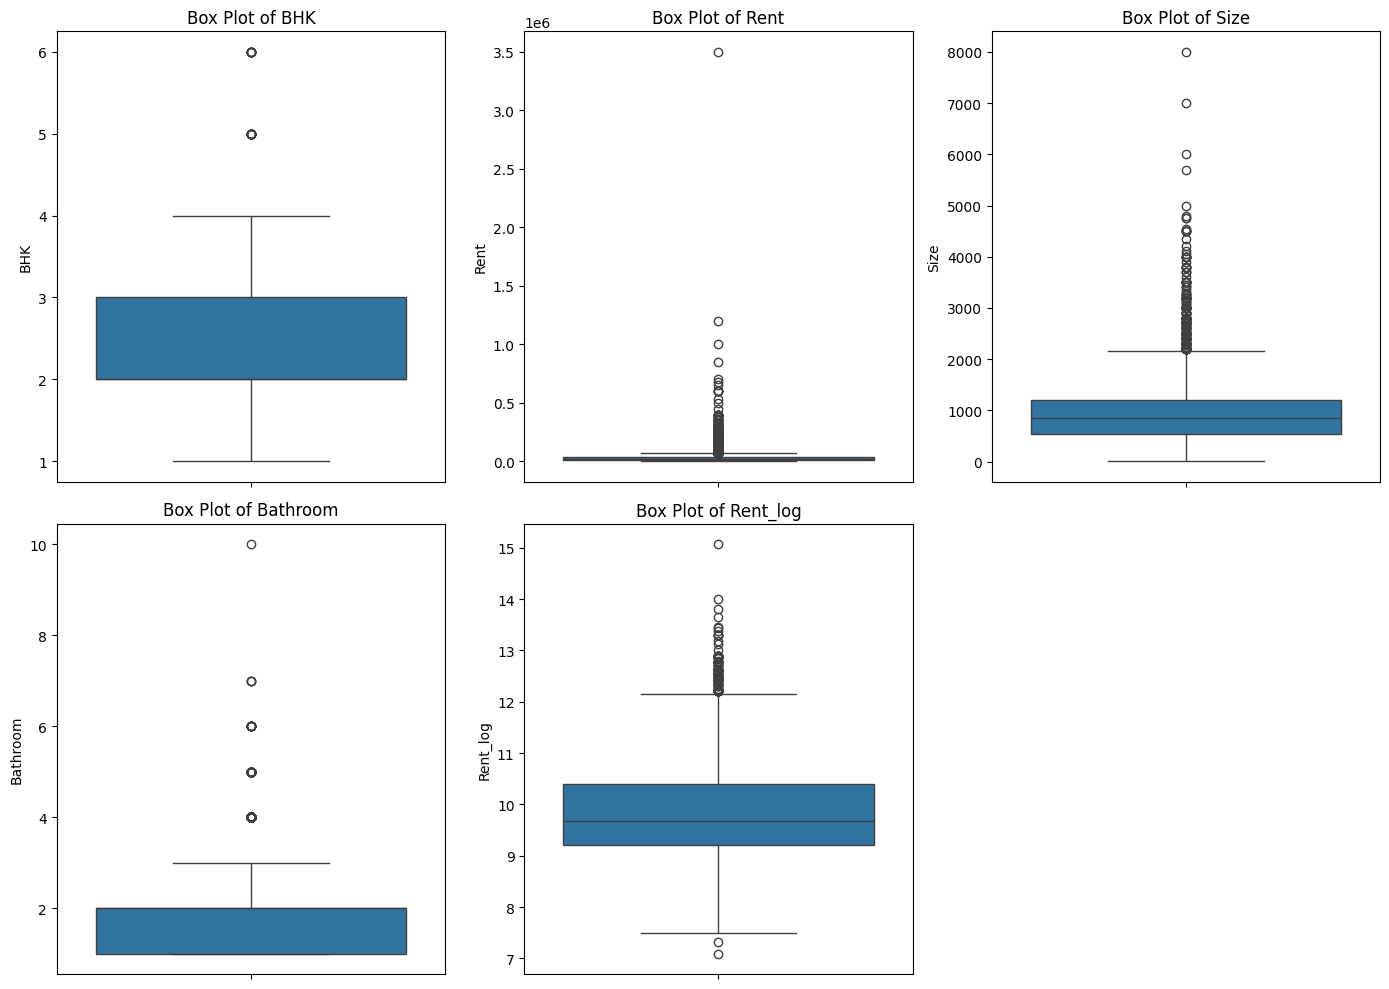

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)+2)//3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

Finding the Count and %age of Outliers in each Feature

Find the Count and Percentage of Outliers in each Feature

In [ ]:
def find_outliers_iqr(df,threshold=1.5):
    outliers_summary={}
    numeric_cols=df.select_dtypes(include=['int32','float32','float64','int64']).columns

    for col in numeric_cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1

        lower_bound=Q1-threshold*IQR
        upper_bound=Q3+threshold*IQR

        outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]

        outliers_summary[col]={
            "outlier_count" : outliers.shape[0],
            "outlier_percentage":100* outliers.shape[0]/df.shape[0],
            "lower_bound":lower_bound,
            "upper_bound":upper_bound
        }

    return pd.DataFrame(outliers_summary)

find_outliers_iqr(df,1.5)


,BHK,Rent,Size,Bathroom,Rent_log
outlier_count,27.0000,520.000000,203.000000,232.000000,116.000000
outlier_percentage,0.5689,10.956595,4.277286,4.888327,2.444164
lower_bound,0.5000,-24500.000000,-425.000000,-0.500000,7.419661
upper_bound,4.5000,67500.000000,2175.000000,3.500000,12.195072


Removing Outliers

In [ ]:
def remove_outliers_from_all_columns(df,threshold=1.5):
    df_clean=df.copy()
    numeric_cols=df.select_dtypes(include=["float64","int64"]).columns

    for col in numeric_cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)

        IQR=Q3-Q1

        lower_bound=Q1-threshold*IQR
        upper_bound=Q3+threshold*IQR

        df_clean=df_clean[(df_clean[col]>=lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean.copy()

df_all_clean=remove_outliers_from_all_columns(df)
print("All columns cleaning shape: " , df_all_clean.shape)

All columns cleaning shape:  (4129, 13)


Split into Training and Test Sets

In [ ]:
def parse_floor(floor):
    if isinstance(floor, str):
        floor = floor.lower()

        if "ground" in floor:
            current_floor = 0
        elif "basement" in floor:
            current_floor = -1
        else:
            try:
                current_floor = int(floor.split("out")[0].strip())
            except:
                current_floor = np.nan

        try:
            total_floors = int(floor.split("out of")[1].strip())
        except:
            total_floors = np.nan

        return pd.Series([current_floor, total_floors])

    return pd.Series([np.nan, np.nan])

df_all_clean[["floor_current", "floor_total"]] = df_all_clean["Floor"].apply(parse_floor)
df_all_clean.drop(columns=["Floor"], inplace=True)
df_all_clean["floor_current"].fillna(df_all_clean["floor_current"].median(), inplace=True)
df_all_clean["floor_total"].fillna(df_all_clean["floor_total"].median(), inplace=True)


df_all_clean["Posted On"] = pd.to_datetime(df_all_clean["Posted On"])

df_all_clean["posted_year"] = df_all_clean["Posted On"].dt.year
df_all_clean["posted_month"] = df_all_clean["Posted On"].dt.month
df_all_clean["posted_day"] = df_all_clean["Posted On"].dt.day


df_encoded = pd.get_dummies(
    df_all_clean,
    columns=[
        "Area Type",
        "City",
        "Posted On",
        "Area Locality",
        "Furnishing Status",
        "Tenant Preferred",
        "Point of Contact"
    ],
    drop_first=True
)

In [ ]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop("Rent_log", axis=1)
y = df_encoded["Rent_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=15
)


Standard Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=np.number).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Convert Categorical Features

In [ ]:
df_encoded.head()

,BHK,Rent,Size,Bathroom,Rent_log,floor_current,floor_total,posted_year,posted_month,posted_day,...,Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,9.210440,0.0,2.0,2022,5,18,...,False,False,False,False,False,True,True,False,False,True
1,2,20000,800,1,9.903538,1.0,3.0,2022,5,13,...,False,False,False,False,True,False,True,False,False,True
2,2,17000,1000,1,9.741027,1.0,3.0,2022,5,16,...,False,False,False,False,True,False,True,False,False,True
3,2,10000,800,1,9.210440,1.0,2.0,2022,7,4,...,False,False,False,False,False,True,True,False,False,True
4,2,7500,850,1,8.922792,1.0,2.0,2022,5,9,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
X

,BHK,Rent,Size,Bathroom,floor_current,floor_total,posted_year,posted_month,posted_day,Area Type_Carpet Area,...,Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0.0,2.0,2022,5,18,False,...,False,False,False,False,False,True,True,False,False,True
1,2,20000,800,1,1.0,3.0,2022,5,13,False,...,False,False,False,False,True,False,True,False,False,True
2,2,17000,1000,1,1.0,3.0,2022,5,16,False,...,False,False,False,False,True,False,True,False,False,True
3,2,10000,800,1,1.0,2.0,2022,7,4,False,...,False,False,False,False,False,True,True,False,False,True
4,2,7500,850,1,1.0,2.0,2022,5,9,True,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,3.0,5.0,2022,5,18,True,...,False,False,False,False,True,False,True,False,False,True
4742,3,29000,2000,3,1.0,4.0,2022,5,15,False,...,False,False,False,False,True,False,True,False,False,True
4743,3,35000,1750,3,3.0,5.0,2022,7,10,True,...,False,False,False,False,True,False,True,False,False,False
4744,3,45000,1500,2,23.0,34.0,2022,7,6,True,...,False,False,False,False,True,False,False,True,False,False


In [ ]:
y

,Rent_log
0,9.210440
1,9.903538
2,9.741027
3,9.210440
4,8.922792
...,...
4741,9.615872
4742,10.275086
4743,10.463132
4744,10.714440


Model Selection and Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
models={
    "LR":LinearRegression(),
    "RF":RandomForestRegressor(
                    n_estimators=200,
                    max_depth=10,
                    min_samples_leaf=30,
                    min_samples_split=50,
                    random_state=42,
                    n_jobs=-1),
    "Adaboost": AdaBoostRegressor(),
    "GradBoost": GradientBoostingRegressor(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(max_depth=5,
                                           min_samples_leaf=50,
                                           min_samples_split=100,
                                           random_state=42)
}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the evaluate_model function that was missing
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

model_results={}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    model_results[list(models.keys())[i]]={
          "Train RMSE" : model_train_rmse,
          "Train MAE" :  model_train_mae,
          "Train R2" : model_train_r2,
          "Test RMSE" : model_test_rmse,
          "Test MAE" : model_test_mae,
          "Test R2" : model_test_r2,
    }

results_df=pd.DataFrame(model_results).T
display(results_df)

,Train RMSE,Train MAE,Train R2,Test RMSE,Test MAE,Test R2
LR,0.094945,0.052703,0.979598,0.226083,0.172843,0.877056
RF,0.044839,0.018037,0.995450,0.042824,0.016924,0.995589
Adaboost,0.068869,0.055798,0.989266,0.068372,0.054784,0.988756
GradBoost,0.001012,0.000358,0.999998,0.003924,0.000748,0.999963
Ridge Regression,0.124669,0.094228,0.964825,0.201304,0.155433,0.902529
Lasso Regression,0.204623,0.159246,0.905239,0.198270,0.155574,0.905444
Decision Tree,0.057158,0.033182,0.992606,0.054458,0.031389,0.992867


Plotting the Results

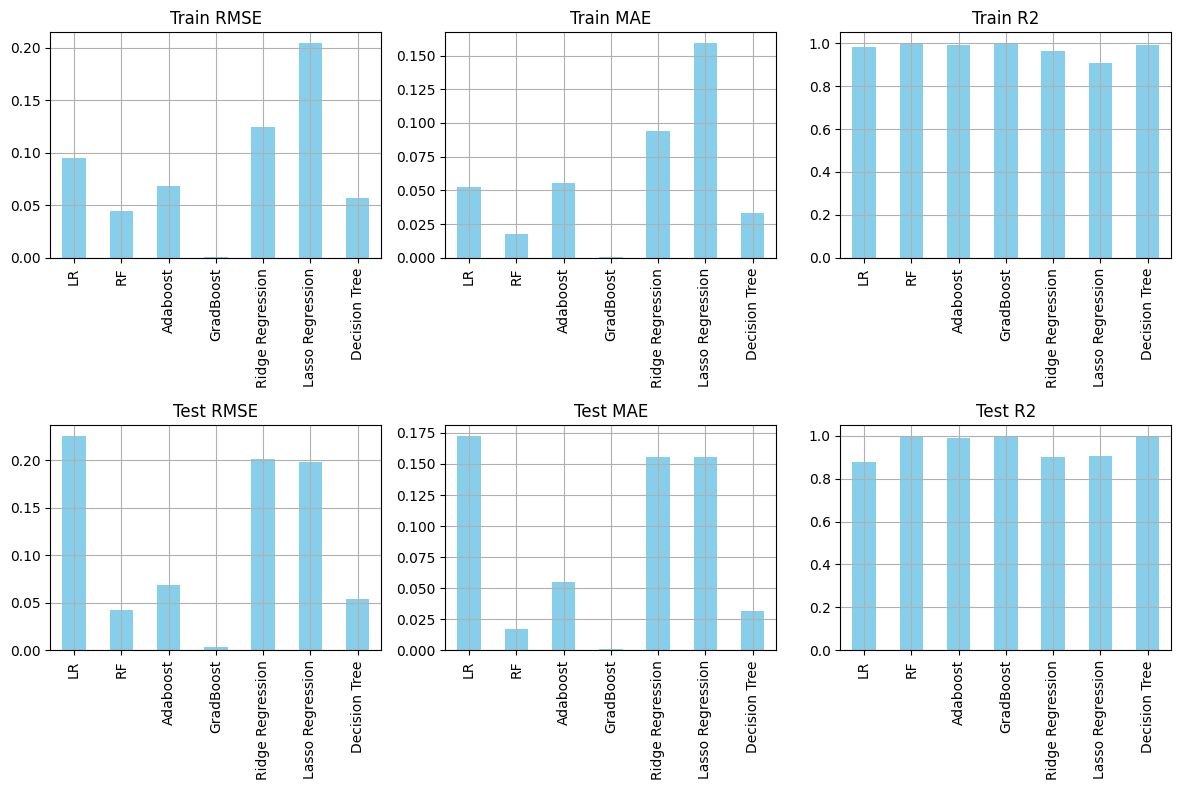

In [ ]:
metrics=['Train RMSE','Train MAE','Train R2','Test RMSE','Test MAE','Test R2']
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(12,8))
axes=axes.flatten()

for i,metric in enumerate(metrics):
    results_df[metric].plot(kind='bar',ax=axes[i],color='SkyBlue')
    axes[i].set_title(metric)
    axes[i].grid()

plt.tight_layout()
plt.savefig('model_metrics.png')
plt.show()

Fine Tuning the model using GridSearch

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    "alpha": np.logspace(-4, 4, 20)
}

ridge = Ridge()

grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best alpha for Ridge:", grid_search.best_params_)
print("Best CV R² for Ridge:", grid_search.best_score_)


Fine Tuning the model using RandomSearch

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import numpy as np

ridge = Ridge()

param_dist = {
    "alpha": loguniform(1e-4, 1e2)   # from 0.0001 to 100
}

random_search_ridge = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=30,          # 20–50 is usually enough
    cv=5,
    scoring="r2",
    random_state=42,
    n_jobs=-1
)

random_search_ridge.fit(X_train, y_train)

print("Best alpha for Ridge (Random Search):",
      random_search_ridge.best_params_)
print("Best CV R² for Ridge (Random Search):",
      random_search_ridge.best_score_)


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model, X, y, cv=5, scoring="r2"
)
scores.mean(), scores.std()
